In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

import createModels as cm
import createSample as cs
import shap_explainer as shap

from importlib import reload
reload(cm)
reload(cs)
reload(shap)

<module 'shap_explainer' from 'C:\\Users\\mehes\\OneDrive - Bar-Ilan University - Students\\Documents\\DST Amit\\project\\shap_explainer.py'>

In [2]:
#configuration
dataset_list = ['wine','cancer','HoussePrice','mushrooms']
pourcent = [0.05, 0.10, 0.20 , 0.30]

In [3]:
def read_data(dataset_name):
    print('in read data')
    if dataset_name == 'wine':
        df = pd.read_pickle('wine.pkl')  # Load the data

    if dataset_name == 'cancer':
        df = pd.read_pickle("cancer.pkl")
          
    if dataset_name == 'HoussePrice':
        df = pd.read_pickle("HoussePrice.pkl")
        
    if dataset_name == 'mushrooms':
        df = pd.read_pickle("mushrooms.pkl")
        

    print('shape of dataset',df.shape)

    return df



In [4]:
def flow(df,ds):
    now = datetime.now()
    #create basic model for dataset
    #last columns is the target , the dataset was prepocessed
    c_model = cm.CreateModels(df)
    #model is the trained XGBoost model
    model = c_model.create_model()
    #constrator of create samples object
    create_samples = cs.CreateSample(df,model)
    # compute shap value for all the datatset
    shap_value = create_samples.compute_shap_value(df.iloc[:, :-1])
    #a list that save all the score from all percents and methods
    avg_score_list = []
    #50 iterations with different random samples
    for i in range(5):
        print(i)
        #shift mean method didn't converge for the credit card ds
        if ds == 'creditcard':
            method_sample = ['Kmeans','uniform']
        else:
            #3 methods for creating samples
            method_sample = ['Kmeans','uniform','shift']
        #score_dict contain scores for specifique metod m
        score_dict = {}
        #pourcent = [0.05, 0.10, 0.20 , 0.30]
        for m in method_sample:
            #relative_mad_dict contain MAD error for each percent
            relative_mad_dict = {}
            print('method:' , m)
            for p in pourcent:
                #create sample for method m and percent p
                sample  = create_samples.create_sample(m,p)
                #compute mean shap value per feature in the sample
                shap_value_sample = create_samples.compute_shap_value(sample)
                #compute relative error against the mean value in the entire dataset
                #refer to create_samples.comparison function for full calculation details
                relative_mad = create_samples.comparison(shap_value, shap_value_sample)
                relative_mad_dict[p]=relative_mad
            score_dict[m] = relative_mad_dict
        avg_score_list.append(score_dict)
        #rearrange scores of all samples and all percents
        matrix_score = {}
        for method in method_sample:
            list_rows = []
            for score_dict in avg_score_list:
                row =  np.array(list(score_dict[method].values()))
                list_rows.append(row)

            matrix_score[method] = np.vstack(list_rows)  
            
    #average for eah method
    avg_score={}
    std_score = {}
    for method in method_sample:
        avg_score[method] = matrix_score[method].mean(axis = 0)
        std_score[method] = matrix_score[method].std(axis = 0)
    #avg_score
    score_dict = avg_score

    #save score to file
    file_name = ds + '.xlsx'
    df = pd.DataFrame(score_dict)
    df.to_excel(file_name,index =False)
    
    plot_score(avg_score,std_score)
    
        
        
    print (f' actual_run time is {datetime.now()-now}')

In [5]:
def plot_score(score_dict,std_score):
    # set width of bar
    barWidth = 0.15
    fig = plt.subplots(figsize=(12,8))

    #colors = ['tab:blue','tab:orange','tab:green']
    colors = ['violet', 'skyblue', 'peachpuff']
    br = np.arange(len(pourcent))
    i = 0
    for m in score_dict:
        print(m, score_dict[m])
        plt.bar(br, score_dict[m],
                color=colors[i], 
                width=barWidth,
                edgecolor='grey', label=m)  
        plt.errorbar(br, score_dict[m], yerr = std_score[m],fmt='o',ecolor = 'red',color='yellow')
        br = [x + barWidth for x in br]
        print(br)
        i += 1
      

    # Adding Xticks
    plt.xlabel('Sample Percent', fontweight='bold', fontsize=10)
    plt.ylabel('Relative MAD', fontweight='bold', fontsize=10)
    plt.xticks([r + barWidth for r in range(len(pourcent))],pourcent)
    plt.legend()
    plt.title("sample for " + ds + " dataset")
    plot_name = ds +'.png'
    plt.savefig(plot_name)
    plt.show()



in read data
shape of dataset (1599, 12)
flow
[12:05:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming o

0
method: Kmeans


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


method: uniform
method: shift


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


1
method: Kmeans


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


method: uniform
method: shift


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


2
method: Kmeans


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


method: uniform
method: shift


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


3
method: Kmeans


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


method: uniform
method: shift


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


4
method: Kmeans


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


method: uniform
method: shift


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Kmeans [0.08589654 0.05212509 0.04458969 0.03035887]
[0.15, 1.15, 2.15, 3.15]
uniform [0.0865401  0.06027668 0.03325446 0.03666973]
[0.3, 1.2999999999999998, 2.3, 3.3]
shift [0.11237772 0.07772841 0.03541791 0.02545751]
[0.44999999999999996, 1.4499999999999997, 2.4499999999999997, 3.4499999999999997]


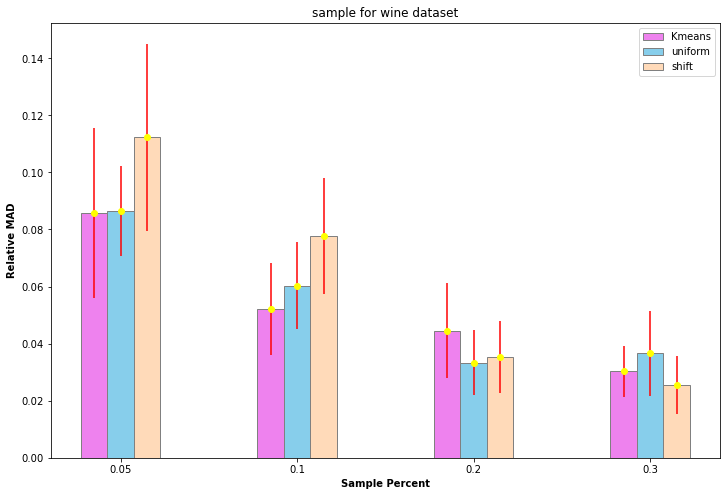

 actual_run time is 0:05:08.522667
in read data
shape of dataset (858, 33)
flow
[12:10:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming o

0
method: Kmeans


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


method: uniform
method: shift


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


1
method: Kmeans


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


method: uniform
method: shift


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


2
method: Kmeans


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


method: uniform
method: shift


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


3
method: Kmeans


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


method: uniform
method: shift


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


4
method: Kmeans


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


method: uniform
method: shift


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Kmeans [0.14225465 0.11432779 0.08209555 0.05955684]
[0.15, 1.15, 2.15, 3.15]
uniform [0.14593789 0.11878701 0.07876037 0.03960946]
[0.3, 1.2999999999999998, 2.3, 3.3]
shift [0.12671223 0.13479353 0.07970261 0.0520019 ]
[0.44999999999999996, 1.4499999999999997, 2.4499999999999997, 3.4499999999999997]


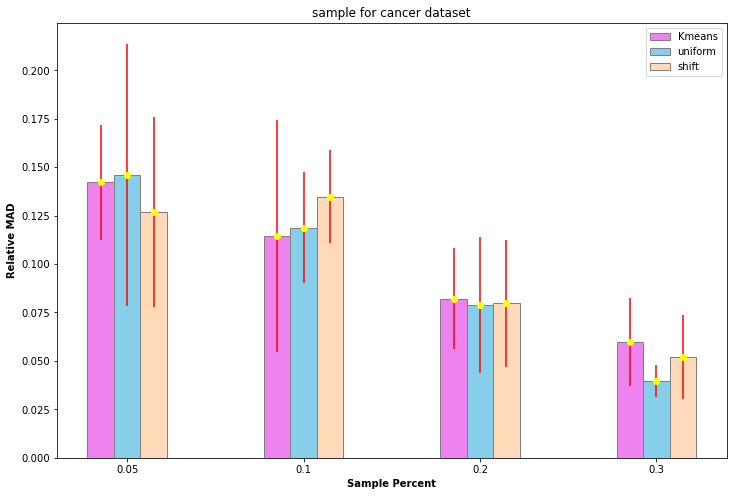

 actual_run time is 0:01:10.762725
in read data
shape of dataset (2919, 21)
flow
[12:11:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming o

0
method: Kmeans


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


method: uniform
method: shift


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


1
method: Kmeans


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


method: uniform
method: shift


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


2
method: Kmeans


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


method: uniform
method: shift


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


3
method: Kmeans


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


method: uniform
method: shift


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


4
method: Kmeans


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


method: uniform
method: shift


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Kmeans [0.02920445 0.01826383 0.01607677 0.01106481]
[0.15, 1.15, 2.15, 3.15]
uniform [0.04009745 0.03539784 0.01551727 0.0096554 ]
[0.3, 1.2999999999999998, 2.3, 3.3]
shift [0.02228384 0.01618666 0.02031514 0.00991411]
[0.44999999999999996, 1.4499999999999997, 2.4499999999999997, 3.4499999999999997]


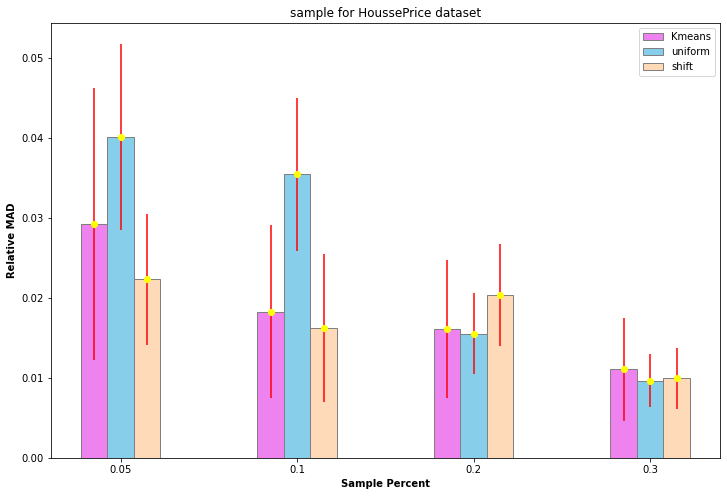

 actual_run time is 0:10:52.736700
in read data
shape of dataset (8124, 22)
flow
[12:22:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming o

0
method: Kmeans


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


method: uniform
method: shift


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [ ]:
#pourcent = [0.05, 0.10, 0.20 ,0.30]
#dataset_list = ['wine','cancer','HoussePrice','mushrooms']
#create sample of different percent amount for the 4 dataset

#ds is the dataset name
for ds in dataset_list:
    df = read_data(ds)
    print('flow')
    flow(df,ds)
    


In [ ]:
#after we analize the sample,we want to create sample of the dataset and get the SHAP explaination
dataset_name = ['wine','cancer', 'HoussePrice','mushrooms']
print(dataset_name)
ds = input("please enter dataset name from the list ")
df = read_data(ds)
p = input("please enter percent of dataset that you want to sample ")


In [ ]:
p = float(p)
c_model = cm.CreateModels(df)
#model is the trained XGBoost model
model = c_model.create_model()
create_samples = cs.CreateSample(df,model)
if p <= 0.20 :
    sample = create_samples.create_sample('Kmeans', p)
else:
    sample = create_samples.create_sample('uniform', p)
    

In [ ]:
import pickle
sample.shape
with open('model_for_shap.pkl', 'wb') as f:
        pickle.dump(model, f)
sample.to_pickle('sample_for_shap.pkl')

In [ ]:
#create explaination with SHAP
#you can send all the data or sample of the data
shap = shap.ShapModelExplainer(model, sample)
shap.explain()